In [1]:
from cifar10_example import *

In [2]:
def build_half_teacher_model():
  # about half the size of the teacher (2,3 Conv layers -> 1 Conv layer)
  # layers that are deleted from teacher are commented
  model = Sequential()
  weight_decay = 0.0005

  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.4))

  #model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.4))

  #model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.4))

  #model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  #model.add(Activation('relu'))
  #model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model

In [3]:
teacher = Model(build_teacher_model, "cifar10_teacher", fn_compile)
teacher.load() # pretrained teacher. (loss, acc) = (0.44668698687553404, 0.9359)

In [4]:
xd,yd,xt,yt = load_data()
BATCH = 128
EPOCH = 10

In [5]:
student = Model(build_half_teacher_model, "cifar10_half_teacher_student", fn_compile)
callbacks = [keras.callbacks.TensorBoard('logs')]
h2 = student.train(xd,yd,BATCH,EPOCH,callbacks,(xt,yt))

student.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1040s 21ms/step - loss: 2.7900 - acc: 0.3631 - val_loss: 3.6014 - val_acc: 0.2111
Epoch 2/10
50000/50000 [==============================] - 1051s 21ms/step - loss: 2.0519 - acc: 0.5561 - val_loss: 2.1898 - val_acc: 0.4802
Epoch 3/10
50000/50000 [==============================] - 1080s 22ms/step - loss: 1.7460 - acc: 0.6453 - val_loss: 1.7970 - val_acc: 0.6311
Epoch 4/10
50000/50000 [==============================] - 1008s 20ms/step - loss: 1.5715 - acc: 0.6971 - val_loss: 1.6631 - val_acc: 0.6614
Epoch 5/10
50000/50000 [==============================] - 1030s 21ms/step - loss: 1.4607 - acc: 0.7321 - val_loss: 1.5474 - val_acc: 0.6974
Epoch 6/10
50000/50000 [==============================] - 988s 20ms/step - loss: 1.4202 - acc: 0.7457 - val_loss: 1.6026 - val_acc: 0.6845
Epoch 7/10
50000/50000 [==============================] - 1030s 21ms/step - loss: 1.3840 - acc: 0.7601 - val_lo

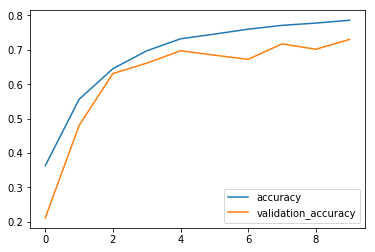

In [6]:
plt.plot(h2.history['acc'], label='accuracy')
plt.plot(h2.history['val_acc'], label='validation_accuracy')
plt.legend()

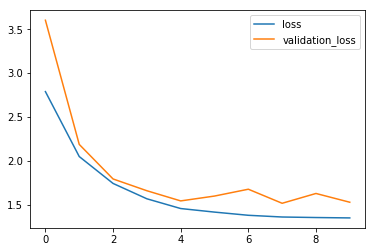

In [7]:
plt.plot(h2.history['loss'], label='loss')
plt.plot(h2.history['val_loss'], label='validation_loss')
plt.legend()

In [9]:
student2 = Model(build_half_teacher_model, "cifar10_half_teacher_student", fn_compile)
yd = np.load("datasets/cifar10preprocessed/train_y.npy")
yt = np.load("datasets/cifar10preprocessed/test_y.npy")

distill = Distill(teacher, student2, 10, 5.0, 0.07)
h3 = distill.teach(xd, yd, BATCH, EPOCH, callbacks, (xt,yt), pre_processed=True)
student2.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1085s 22ms/step - loss: 2.8895 - accuracy: 0.4261 - top_5_accuracy: 0.8877 - categorical_crossentropy: 1.9031 - soft_logloss: 2.1319 - val_loss: 3.0416 - val_accuracy: 0.2119 - val_top_5_accuracy: 0.6814 - val_categorical_crossentropy: 4.1164 - val_soft_logloss: 2.3244
Epoch 2/10
50000/50000 [==============================] - 1027s 21ms/step - loss: 2.4364 - accuracy: 0.6233 - top_5_accuracy: 0.9603 - categorical_crossentropy: 1.2322 - soft_logloss: 2.0086 - val_loss: 2.4546 - val_accuracy: 0.5523 - val_top_5_accuracy: 0.9288 - val_categorical_crossentropy: 1.4924 - val_soft_logloss: 2.0630
Epoch 3/10
50000/50000 [==============================] - 1045s 21ms/step - loss: 2.3052 - accuracy: 0.6898 - top_5_accuracy: 0.9722 - categorical_crossentropy: 1.0445 - soft_logloss: 1.9646 - val_loss: 2.3350 - val_accuracy: 0.6597 - val_top_5_accuracy: 0.9627 - val_categorical_crossentropy: 

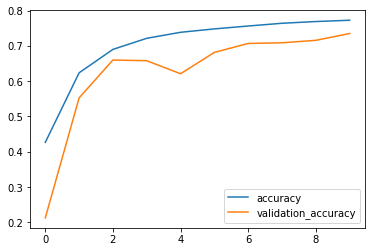

In [10]:
plt.plot(h3.history['accuracy'], label='accuracy')
plt.plot(h3.history['val_accuracy'], label='validation_accuracy')
plt.legend()

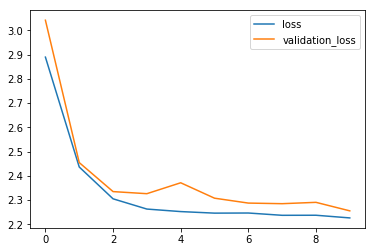

In [11]:
plt.plot(h3.history['loss'], label='loss')
plt.plot(h3.history['val_loss'], label='validation_loss')
plt.legend()

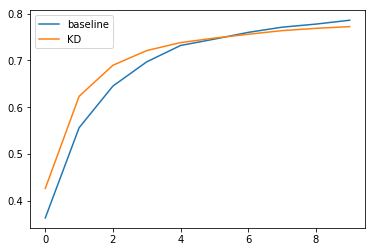

In [12]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.legend()

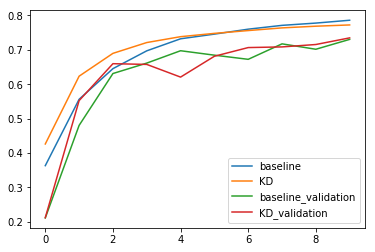

In [13]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.plot(h2.history['val_acc'], label='baseline_validation')
plt.plot(h3.history['val_accuracy'], label='KD_validation')
plt.legend()

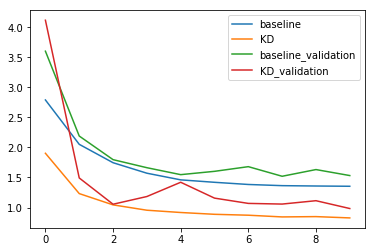

In [14]:
plt.plot(h2.history['loss'], label='baseline')
plt.plot(h3.history['categorical_crossentropy'], label='KD')
plt.plot(h2.history['val_loss'], label='baseline_validation')
plt.plot(h3.history['val_categorical_crossentropy'], label='KD_validation')
plt.legend()

In [15]:
for key in h2.history.keys():
    print(key)
    print(h2.history[key])

val_loss
[3.6014174194335937, 2.189846297454834, 1.7969718326568604, 1.6630809268951416, 1.5474165073394774, 1.6026105184555053, 1.6803451551437378, 1.520456735610962, 1.6319808254241943, 1.532287043952942]
val_acc
[0.2111, 0.4802, 0.6311, 0.6614, 0.6974, 0.6845, 0.6724, 0.7174, 0.7017, 0.7304]
loss
[2.7900055387878417, 2.051897141494751, 1.7460391230010985, 1.5715070838928222, 1.4607137179946899, 1.4201695056533814, 1.3839563165283204, 1.3643923444366455, 1.3584657317352296, 1.354069058265686]
acc
[0.3631000000190735, 0.556099999961853, 0.645279999961853, 0.697100000038147, 0.7321199999809265, 0.745700000038147, 0.7600999999809265, 0.7712, 0.7778199999809265, 0.7860800000381469]


In [16]:
for key in h3.history.keys():
    print(key)
    print(h3.history[key])

val_loss
[3.0415891574859617, 2.4545891242980957, 2.3349678157806397, 2.3263543476104735, 2.3713645595550537, 2.3078007305145265, 2.2876031044006346, 2.285124997329712, 2.2906598274230956, 2.2555622928619385]
val_accuracy
[0.2119, 0.5523, 0.6597, 0.6576, 0.6207, 0.6813, 0.7066, 0.7085, 0.7155, 0.7348]
val_top_5_accuracy
[0.6814, 0.9288, 0.9627, 0.9474, 0.9441, 0.9646, 0.9715, 0.976, 0.9707, 0.9708]
val_categorical_crossentropy
[4.116410712432861, 1.4923663314819335, 1.0552888063430785, 1.1834354804992675, 1.4207642642974854, 1.1569680129051207, 1.0690364051818848, 1.0579460584640503, 1.1139884838104248, 0.9837762031555176]
val_soft_logloss
[2.324372554397583, 2.062960200881958, 2.0048336402893066, 1.9931190410614015, 2.009685680770874, 1.9591018171310426, 1.9382358617782594, 1.9343484733581544, 1.94064384765625, 1.9200420232772828]
loss
[2.8894547660064696, 2.436437400970459, 2.3052043743896484, 2.2629585926818847, 2.252557420272827, 2.2461449587249755, 2.2466608493041993, 2.2371938745